<a href="https://colab.research.google.com/github/MonicaPatibandla/Machine-Learning/blob/main/ML_Task11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


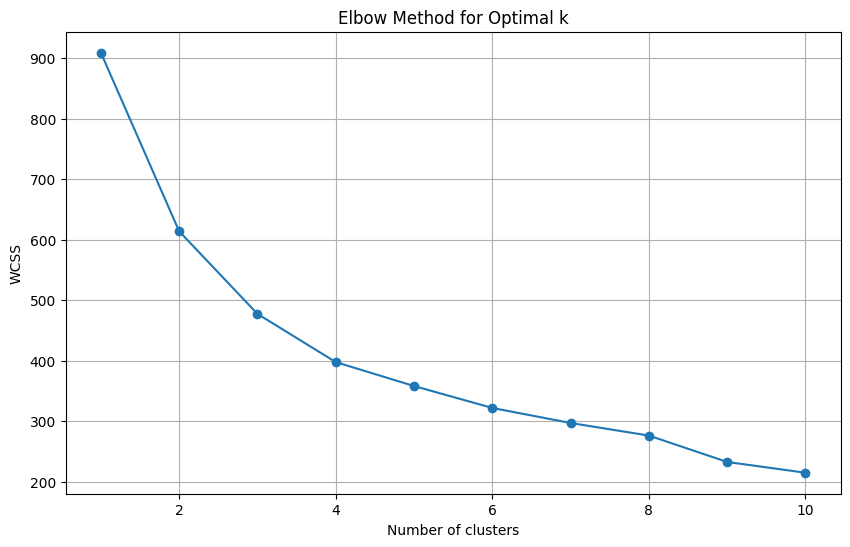

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  Cluster  
0   0     1       1        1  
1   0     2       1        0  
2   0     2       1        0  
3   0     2       1        0  
4   0     2       1        2  


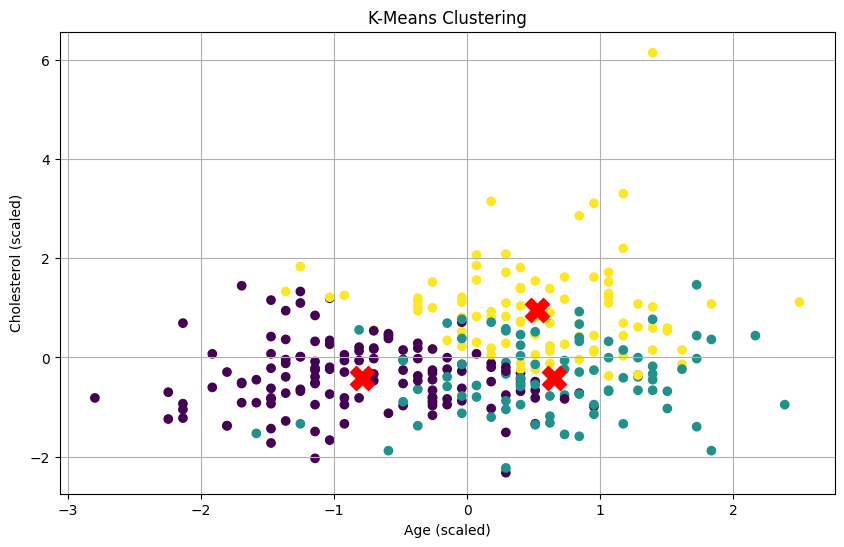

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
print(data.head())

# Select features for clustering (you can choose different features based on your analysis)
# Here, we will use 'age', 'chol', and 'thalach' as an example
features = data[['age', 'chol', 'thalach']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# From the elbow method, choose the number of clusters (let's say we choose 3)
optimal_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

# Display the first few rows of the dataset with cluster labels
print(data.head())

# Visualize the clusters (using the first two features for 2D visualization)
plt.figure(figsize=(10, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')  # Centroids
plt.title('K-Means Clustering')
plt.xlabel('Age (scaled)')
plt.ylabel('Cholesterol (scaled)')
plt.grid()
plt.show()


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
   age  chol  thalach  Cluster
0   63   233      150        0
1   37   250      187       -1
2   41   204      172        0
3   56   236      178        0
4   57   354      163       -1
Estimated number of clusters: 8
Estimated number of noise points: 94
Estimated number of core points: 148
Estimated number of boundary points: 61


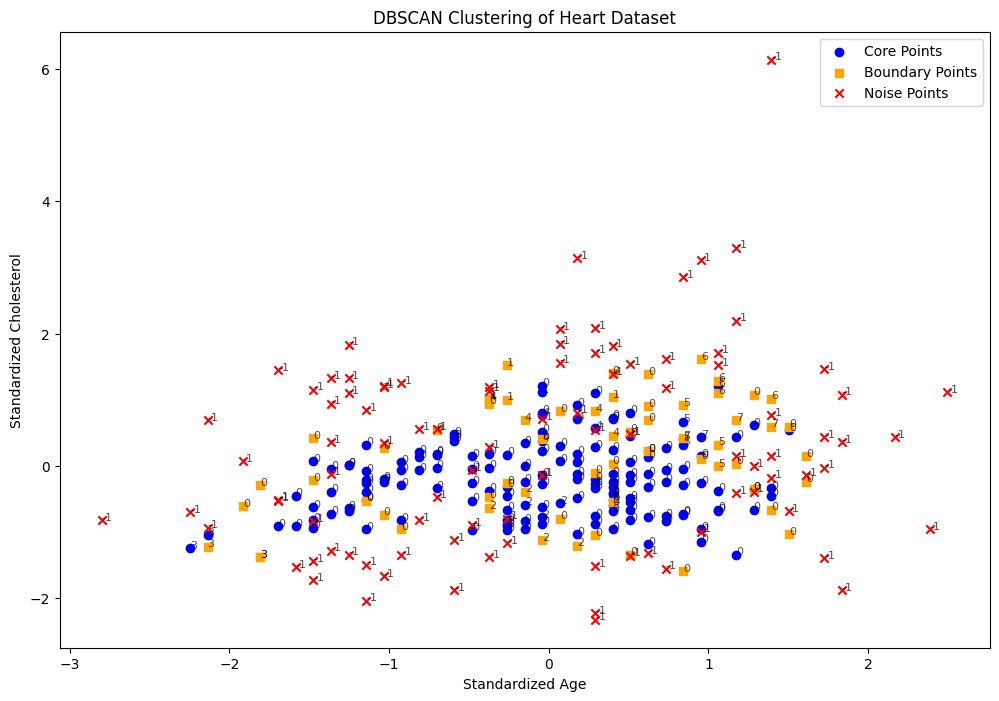

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load the dataset
data = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
print(data.head())

# Select features for clustering
features = data[['age', 'chol', 'thalach']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply DBSCAN
eps_value = 0.5
min_samples_value = 5
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(features_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

# Display the first few rows of the dataset with cluster labels
print(data[['age', 'chol', 'thalach', 'Cluster']].head())

# Count the number of clusters, core points, boundary points, and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

# Identify core points and boundary points
core_samples_mask = np.zeros_like(clusters, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
n_core_points = np.sum(core_samples_mask)

# Boundary points
n_boundary_points = np.sum((~core_samples_mask) & (clusters != -1))

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')
print(f'Estimated number of core points: {n_core_points}')
print(f'Estimated number of boundary points: {n_boundary_points}')

# Visualize the clusters
plt.figure(figsize=(12, 8))

# Plot core points
plt.scatter(features_scaled[core_samples_mask, 0], features_scaled[core_samples_mask, 1],
            c='blue', label='Core Points', marker='o')

# Plot boundary points
plt.scatter(features_scaled[~core_samples_mask & (clusters != -1), 0],
            features_scaled[~core_samples_mask & (clusters != -1), 1],
            c='orange', label='Boundary Points', marker='s')

# Plot noise points
plt.scatter(features_scaled[clusters == -1, 0],
            features_scaled[clusters == -1, 1],
            c='red', label='Noise Points', marker='x')

# Add labels to points
for i, txt in enumerate(data['Cluster']):
    plt.annotate(txt, (features_scaled[i, 0], features_scaled[i, 1]), fontsize=8, alpha=0.7)

# Adding labels and legend
plt.title('DBSCAN Clustering of Heart Dataset')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Cholesterol')
plt.legend()
plt.show()


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
   age  chol  thalach  Cluster
0   63   233      150        0
1   37   250      187        0
2   41   204      172        0
3   56   236      178        0
4   57   354      163        2


<ipython-input-21-81bd6c2a221e>:60: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse(mean, width, height, angle, color=colors[i], alpha=0.3)


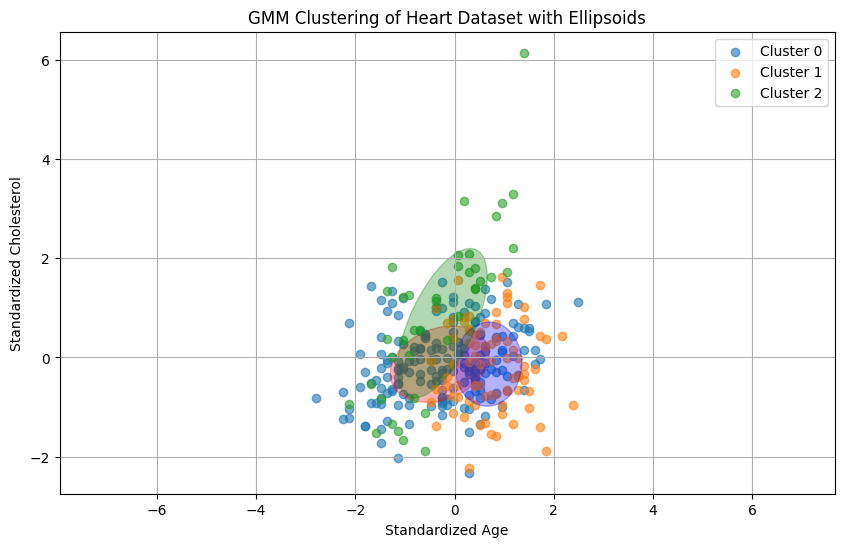

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Load the dataset
data = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
print(data.head())

# Select features for clustering (adjust based on your analysis)
features = data[['age', 'chol', 'thalach']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply Gaussian Mixture Model
n_components = 3  # You can adjust this value based on your analysis
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(features_scaled)
clusters = gmm.predict(features_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

# Display the first few rows of the dataset with cluster labels
print(data[['age', 'chol', 'thalach', 'Cluster']].head())

# Visualize the clusters with ellipsoids
plt.figure(figsize=(10, 6))

# Create a color map for the clusters
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot each cluster
for i in range(n_components):
    plt.scatter(features_scaled[clusters == i, 0], features_scaled[clusters == i, 1],
                label=f'Cluster {i}', alpha=0.6)

    # Get the parameters of the GMM for the current cluster
    mean = gmm.means_[i, :2]  # Select the first two dimensions of the mean
    cov = gmm.covariances_[i, :2, :2]  # Select the 2x2 submatrix of the covariance

    # Create a grid of points
    eigenvalues, eigenvectors = np.linalg.eigh(cov)

    # Compute the angle of rotation for the ellipse
    angle = np.arctan2(eigenvectors[0][1], eigenvectors[0][0])
    angle = np.degrees(angle)

    # Calculate the width and height of the ellipse
    # using only the first two eigenvalues (largest variances)
    width, height = 2 * np.sqrt(eigenvalues)

    # Create an Ellipse object
    ellipse = Ellipse(mean, width, height, angle, color=colors[i], alpha=0.3)
    plt.gca().add_patch(ellipse)

# Adding labels and legend
plt.title('GMM Clustering of Heart Dataset with Ellipsoids')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Cholesterol')
plt.legend()
plt.grid()
plt.axis('equal')  # Equal scaling for the axes
plt.show()